<a href="https://colab.research.google.com/github/randy-ar/gcolab/blob/main/Crime_Data_2020_LAPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Download File Dataset

In [ ]:
google_drive_file_id = "1TpoTuymgEMyV5fLPJdkdwHRzjGey_hB5"

In [ ]:
!pip install gdown

In [ ]:
output_path = 'downloaded_file.csv'  # Anda bisa mengganti nama file output sesuai keinginan
gdown.download(f'https://drive.google.com/uc?id={google_drive_file_id}', output_path, quiet=False)

print(f"File berhasil didownload ke: {output_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1TpoTuymgEMyV5fLPJdkdwHRzjGey_hB5
From (redirected): https://drive.google.com/uc?id=1TpoTuymgEMyV5fLPJdkdwHRzjGey_hB5&confirm=t&uuid=cf25f3ae-4390-4864-a68e-f0ff83a790e6
To: /content/downloaded_file.csv
100%|██████████| 255M/255M [00:03<00:00, 83.9MB/s]

File berhasil didownload ke: downloaded_file.csv


# Inisialisasi Dataframe

In [ ]:
df_init = pd.read_csv('downloaded_file.csv')

In [ ]:
df = df_init.copy()

# Preprocessing Data

## Nilai Null

In [ ]:
df.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


## Format kolom

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
display(df.head())

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Format Tanggal

In [ ]:
df['date_rptd'] = pd.to_datetime(df['date_rptd'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%m/%d/%Y')
df['date_occ'] = pd.to_datetime(df['date_occ'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%m/%d/%Y')
display(df.head())

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,211507896,04/11/2021,11/07/2020,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020,10/18/2020,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024,10/30/2020,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020,12/24/2020,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020,09/29/2020,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Mengisi nilai null modus operandi

In [ ]:
df['mocodes'].unique()

array(['0377', '0416 0334 2004 1822 1414 0305 0319 0400', '0344', ...,
       '1258 0553 0602', '0400 1259 1822 0356', '0529 2024 1815 0913'],
      dtype=object)

In [ ]:
if 0 in df['mocodes'].unique():
    print("Nilai '0' sudah ada di kolom 'mocodes'. Mengisi nilai null dengan '0' akan menimbulkan ambiguitas.")
else:
    print("Nilai '0' belum ada di kolom 'mocodes'. Anda bisa mengisi nilai null dengan '0'.")

Nilai '0' belum ada di kolom 'mocodes'. Anda bisa mengisi nilai null dengan '0'.


In [ ]:
df['mocodes'] = df['mocodes'].fillna('0')
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


## Mengisi nilai null Victim

In [ ]:
df['vict_sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-'], dtype=object)

In [ ]:
df['vict_descent'].unique()

array(['H', 'W', 'A', 'B', nan, 'X', 'O', 'C', 'J', 'V', 'K', 'F', 'I',
       'Z', 'L', 'G', 'P', 'D', 'U', 'S', '-'], dtype=object)

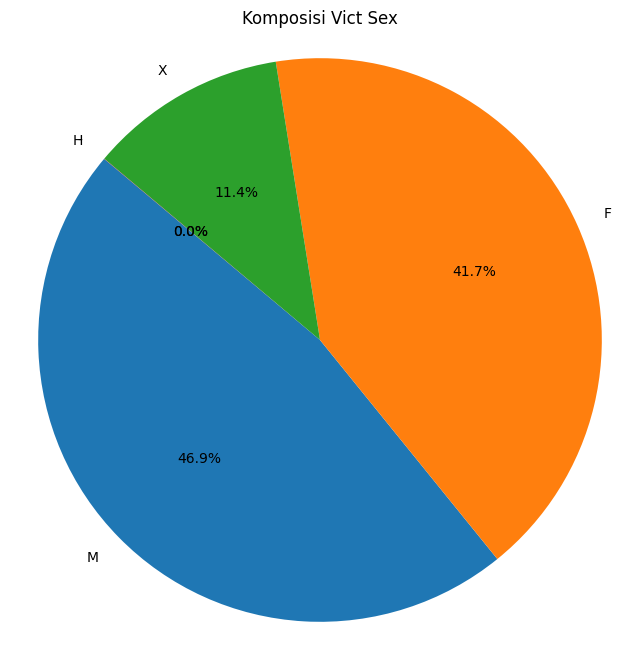

In [ ]:
# Hitung komposisi vict_sex
sex_counts = df['vict_sex'].value_counts().reset_index()
sex_counts.columns = ['vict_sex', 'count']

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts['count'], labels=sex_counts['vict_sex'], autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Vict Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

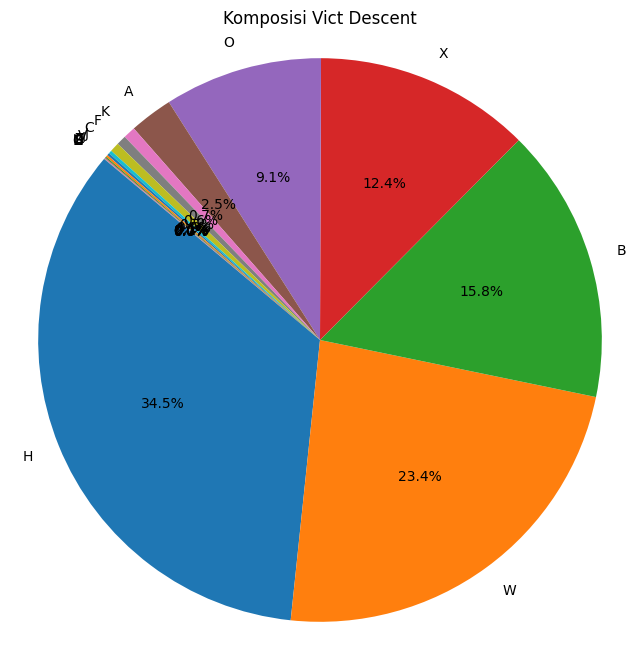

In [ ]:
# Hitung komposisi vict_sex
race_count = df['vict_descent'].value_counts().reset_index()
race_count.columns = ['vict_descent', 'count']

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_count['count'], labels=race_count['vict_descent'], autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Vict Descent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
count_dash_sex = df[df['vict_sex'] == '-'].shape[0]
print(f"Jumlah baris dengan nilai '-' pada kolom 'vict_sex' adalah: {count_dash_sex}")

Jumlah baris dengan nilai '-' pada kolom 'vict_sex' adalah: 1


In [ ]:
count_dash_sex = df[df['vict_descent'] == '-'].shape[0]
print(f"Jumlah baris dengan nilai '-' pada kolom 'vict_descent' adalah: {count_dash_sex}")

Jumlah baris dengan nilai '-' pada kolom 'vict_descent' adalah: 2


In [ ]:
count_dash_sex = df[df['vict_descent'] == 'X'].shape[0]
print(f"Jumlah baris dengan nilai 'X' pada kolom 'vict_descent' adalah: {count_dash_sex}")

Jumlah baris dengan nilai 'X' pada kolom 'vict_descent' adalah: 106685


In [ ]:
df['vict_sex'] = df['vict_sex'].fillna('X')
df['vict_sex'] = df['vict_sex'].replace('-', 'X')
display(df['vict_sex'].unique())
display(df.isnull().sum())

array(['M', 'F', 'X', 'H'], dtype=object)

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


In [ ]:
df['vict_descent'] = df['vict_descent'].fillna('X')
df['vict_descent'] = df['vict_descent'].replace('-', 'X')
display(df['vict_descent'].unique())
display(df.isnull().sum())

array(['H', 'W', 'A', 'B', 'X', 'O', 'C', 'J', 'V', 'K', 'F', 'I', 'Z',
       'L', 'G', 'P', 'D', 'U', 'S'], dtype=object)

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


## Mengisi nilai null kolom lainnya

### Nilai null premis

In [ ]:
0 in df['premis_cd'].unique()

False

In [ ]:
df['premis_cd'] = df['premis_cd'].fillna(0)
0 in df['premis_cd'].unique()

True

In [ ]:
df['premis_desc'] = df['premis_desc'].fillna('Unknown')
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


### Nilai null weapon

In [ ]:
0 in df['weapon_used_cd'].unique()

False

In [ ]:
df['weapon_used_cd'] = df['weapon_used_cd'].fillna(0)
0 in df['weapon_used_cd'].unique()

True

In [ ]:
df['weapon_desc'] = df['weapon_desc'].fillna(df['weapon_used_cd'].apply(lambda x: 'Unknown' if x == 0 else pd.NA))
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


### Nilai null status

In [ ]:
df['status'].unique()

array(['IC', 'AO', 'AA', 'JA', 'JO', 'CC', nan], dtype=object)

In [ ]:
df['status'] = df['status'].fillna('X')
df['status'].unique()

array(['IC', 'AO', 'AA', 'JA', 'JO', 'CC', 'X'], dtype=object)

### nilai null crm 1

In [ ]:
df['crm_cd_1'] = df['crm_cd_1'].fillna(df['crm_cd'])
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


 ### nilai crm 2, 3, 4

In [ ]:
0 in df['crm_cd'].unique()

False

In [ ]:
df[['crm_cd_2', 'crm_cd_3', 'crm_cd_4']] = df[['crm_cd_2', 'crm_cd_3', 'crm_cd_4']].fillna(0)
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


### nilai null cross_street

In [ ]:
df['cross_street'] = df['cross_street'].fillna('Unknown')
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


## Transform Data

### Type data

In [ ]:
display(df.dtypes)

,0
dr_no,int64
date_rptd,object
date_occ,object
time_occ,int64
area,int64
area_name,object
rpt_dist_no,int64
part_1-2,int64
crm_cd,int64
crm_cd_desc,object


### one hot encoding mocodes

In [ ]:
# Fungsi untuk memecah teks pada mocodes dan mengembalikan panjang array terpanjang
def get_longest_mocodes_array_length(df):
    """
    Memecah teks pada kolom 'mocodes' dengan spasi ' ' dan mengembalikan
    panjang array terpanjang.

    Args:
        df (pd.DataFrame): DataFrame yang mengandung kolom 'mocodes'.

    Returns:
        int: Panjang array terpanjang pada kolom 'mocodes'.
    """
    df['mocodes_split'] = df['mocodes'].astype(str).str.split(' ')
    max_length = df['mocodes_split'].apply(len).max()
    return max_length

In [ ]:
# Hitung panjang array terpanjang pada kolom 'mocodes'
longest_array_length = get_longest_mocodes_array_length(df)

print(f"Panjang array terpanjang pada kolom 'mocodes' adalah: {longest_array_length}")

# Hapus kolom 'mocodes_split' yang sementara jika tidak diperlukan lagi
df = df.drop(columns=['mocodes_split'])


Panjang array terpanjang pada kolom 'mocodes' adalah: 10


In [ ]:
# Split 'mocodes' and create new columns
mocodes_split = df['mocodes'].str.split(' ', expand=True)

# Rename the new columns
mocodes_split.columns = [f'mocode_{i+1}' for i in range(mocodes_split.shape[1])]

# Fill null values with 0
mocodes_split = mocodes_split.fillna('0')

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, mocodes_split], axis=1)

# Display the head of the updated DataFrame and check for nulls in the new columns
display(df.head())
display(df[['mocode_1', 'mocode_2', 'mocode_3', 'mocode_4', 'mocode_5', 'mocode_6', 'mocode_7', 'mocode_8', 'mocode_9', 'mocode_10']].isnull().sum())

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,mocode_1,mocode_2,mocode_3,mocode_4,mocode_5,mocode_6,mocode_7,mocode_8,mocode_9,mocode_10
0,211507896,04/11/2021,11/07/2020,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,0377,0,0,0,0,0,0,0,0,0
1,201516622,10/21/2020,10/18/2020,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,0416,0334,2004,1822,1414,0305,0319,0400,0,0
2,240913563,12/10/2024,10/30/2020,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,0377,0,0,0,0,0,0,0,0,0
3,210704711,12/24/2020,12/24/2020,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,0344,0,0,0,0,0,0,0,0,0
4,201418201,10/03/2020,09/29/2020,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,1300,0344,1606,2032,0,0,0,0,0,0


,0
mocode_1,0
mocode_2,0
mocode_3,0
mocode_4,0
mocode_5,0
mocode_6,0
mocode_7,0
mocode_8,0
mocode_9,0
mocode_10,0


In [ ]:
display(df.dtypes)

,0
dr_no,int64
date_rptd,object
date_occ,object
time_occ,int64
area,int64
area_name,object
rpt_dist_no,int64
part_1-2,int64
crm_cd,int64
crm_cd_desc,object


### drop kolom deskripsi

In [ ]:
columns_to_drop = ['area_name', 'crm_cd_desc', 'premis_desc', 'weapon_desc', 'status_desc', 'cross_street']
df = df.drop(columns=columns_to_drop)
display(df.head())

,dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,part_1-2,crm_cd,mocodes,vict_age,...,mocode_1,mocode_2,mocode_3,mocode_4,mocode_5,mocode_6,mocode_7,mocode_8,mocode_9,mocode_10
0,211507896,04/11/2021,11/07/2020,845,15,1502,2,354,0377,31,...,0377,0,0,0,0,0,0,0,0,0
1,201516622,10/21/2020,10/18/2020,1845,15,1521,1,230,0416 0334 2004 1822 1414 0305 0319 0400,32,...,0416,0334,2004,1822,1414,0305,0319,0400,0,0
2,240913563,12/10/2024,10/30/2020,1240,9,933,2,354,0377,30,...,0377,0,0,0,0,0,0,0,0,0
3,210704711,12/24/2020,12/24/2020,1310,7,782,1,331,0344,47,...,0344,0,0,0,0,0,0,0,0,0
4,201418201,10/03/2020,09/29/2020,1830,14,1454,1,420,1300 0344 1606 2032,63,...,1300,0344,1606,2032,0,0,0,0,0,0


In [ ]:
df = df.drop(columns=['mocodes'])

In [ ]:
display(df.dtypes)

,0
dr_no,int64
date_rptd,object
date_occ,object
time_occ,int64
area,int64
rpt_dist_no,int64
part_1-2,int64
crm_cd,int64
vict_age,int64
vict_sex,object


## Label Encoding

### Label encoding victim sex & descent

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan Label Encoding pada kolom 'vict_sex'
df['vict_sex_encoded'] = label_encoder.fit_transform(df['vict_sex'])
df['vict_descent_encoded'] = label_encoder.fit_transform(df['vict_descent'])

display(df[['vict_sex', 'vict_sex_encoded', 'vict_descent', 'vict_descent_encoded']].head())

,vict_sex,vict_sex_encoded,vict_descent,vict_descent_encoded
0,M,2,H,6
1,M,2,H,6
2,M,2,W,16
3,F,0,A,0
4,M,2,H,6


### Label encoding status

In [ ]:
df['status_encoded'] = label_encoder.fit_transform(df['status'])
display(df[['status', 'status_encoded']].head())

,status,status_encoded
0,IC,3
1,IC,3
2,IC,3
3,IC,3
4,IC,3


### Label encoding location

In [ ]:
# prompt: hapus white space dan semua spasi pada location

df['location'] = df['location'].str.replace(' ', '')
display(df[['location']].head())

,location
0,7800BEEMANAV
1,ATOLLAV
2,14600SYLVANST
3,6000COMEYAV
4,4700LAVILLAMARINA


In [ ]:
len(df['location'].unique())

66314

In [ ]:
df['location_encoded'] = label_encoder.fit_transform(df['location'])
display(df[['location', 'location_encoded']].head())

,location,location_encoded
0,7800BEEMANAV,50801
1,ATOLLAV,57962
2,14600SYLVANST,14227
3,6000COMEYAV,43820
4,4700LAVILLAMARINA,38872


## Convert to integer

In [ ]:
# List of columns to exclude from integer conversion
exclude_columns = ['date_rptd', 'date_occ', 'lat', 'lon', 'vict_sex', 'vict_descent', 'status', 'location']

# Identify columns to convert
columns_to_convert = [col for col in df.columns if col not in exclude_columns]

# Convert specified columns to integer, handling potential errors
for col in columns_to_convert:
    try:
        # Attempt to convert to numeric first, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Then convert to integer, filling NaN with a placeholder (like 0) if necessary
        # Or dropping rows with NaN if that's the desired behavior
        # Here, we will fill NaN with 0 before converting to int
        df[col] = df[col].fillna(0).astype(int)
    except Exception as e:
        print(f"Could not convert column {col} to integer: {e}")

display(df.dtypes)

,0
dr_no,int64
date_rptd,object
date_occ,object
time_occ,int64
area,int64
rpt_dist_no,int64
part_1-2,int64
crm_cd,int64
vict_age,int64
vict_sex,object


# Cari Kolom yang paling berdampak

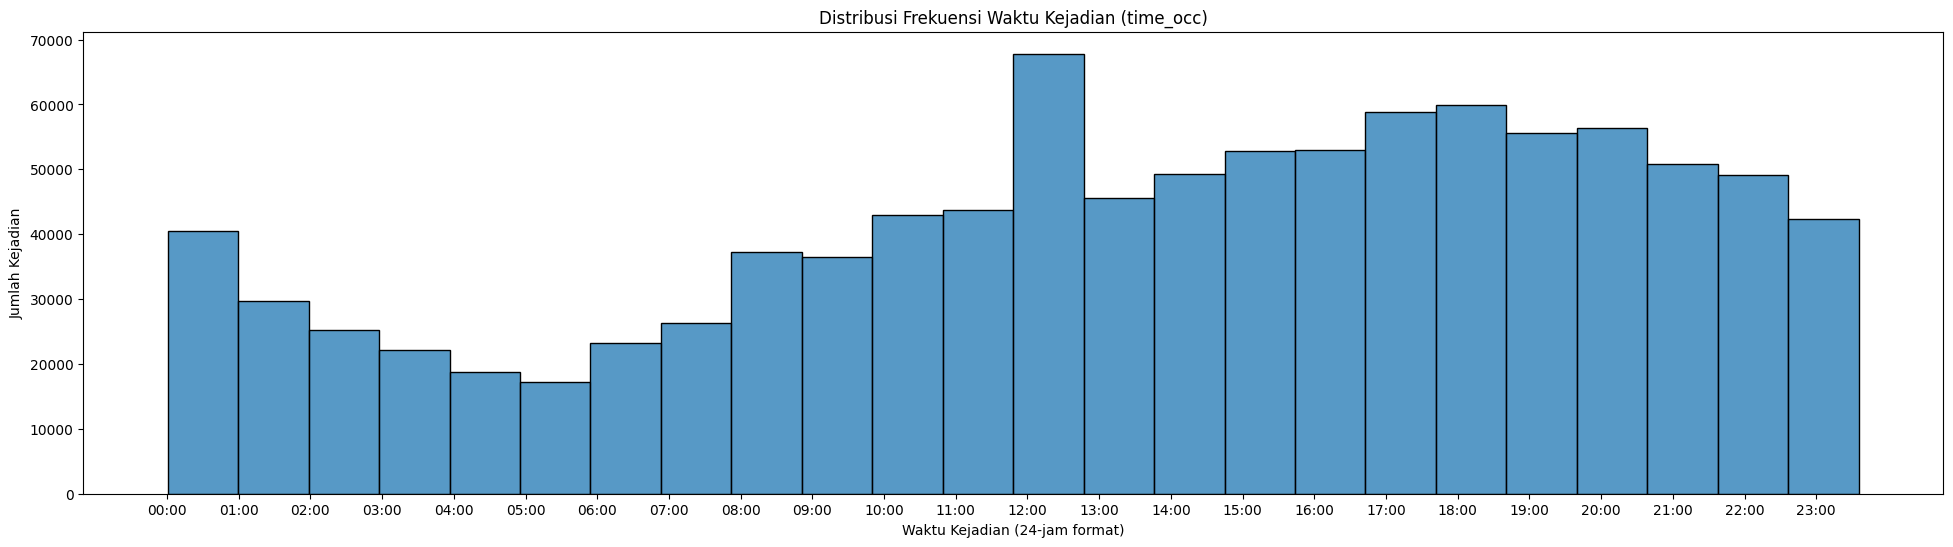

In [ ]:
plt.figure(figsize=(24, 6))
sns.histplot(df['time_occ'], bins=24, kde=False) # Using bins=24 to represent hours
plt.title('Distribusi Frekuensi Waktu Kejadian (time_occ)')
plt.xlabel('Waktu Kejadian (24-jam format)')
plt.ylabel('Jumlah Kejadian')
plt.xticks(range(0, 2400, 100), [f'{h:02d}:00' for h in range(0, 24)]) # Labeling x-axis with hours
plt.show()

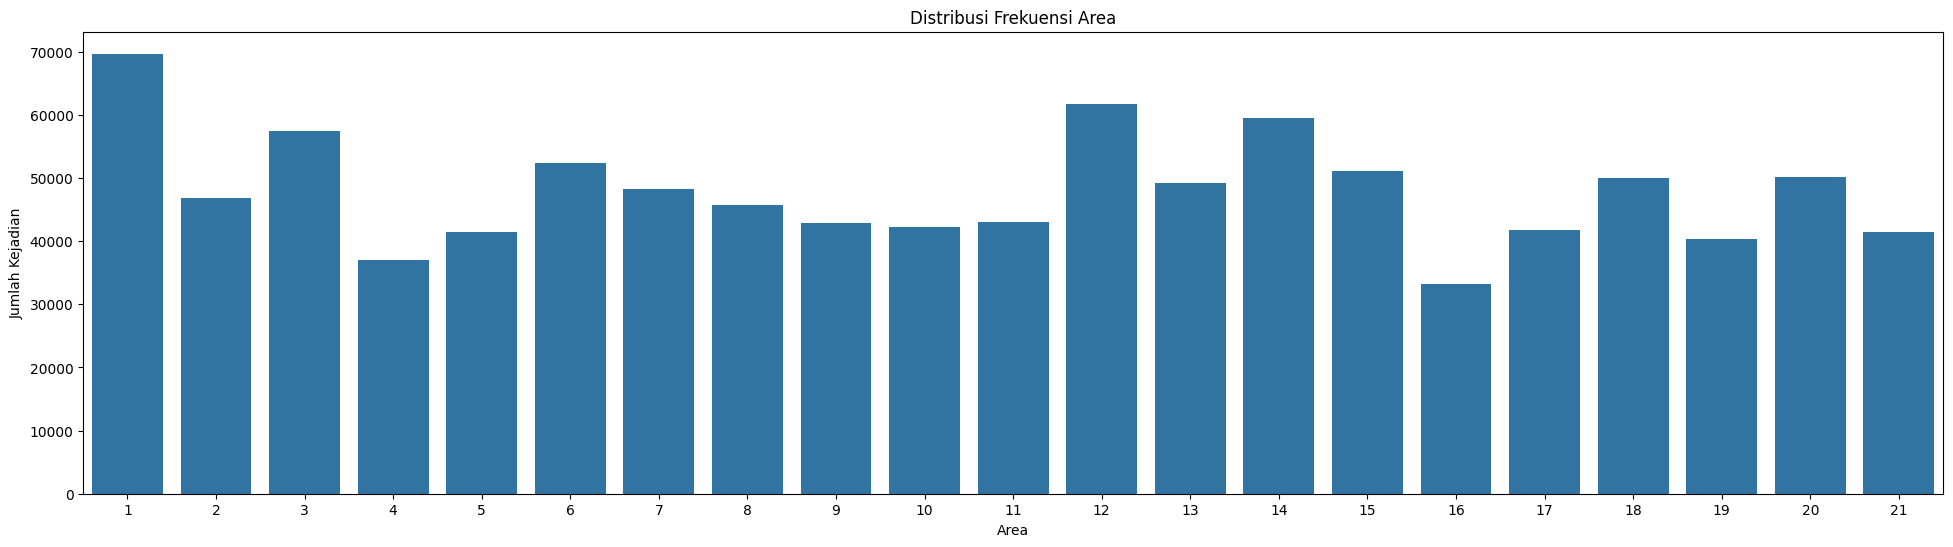

In [ ]:
# Distribusi area
plt.figure(figsize=(24, 6))
sns.countplot(data=df, x='area')
plt.title('Distribusi Frekuensi Area')
plt.xlabel('Area')
plt.ylabel('Jumlah Kejadian')
plt.show()

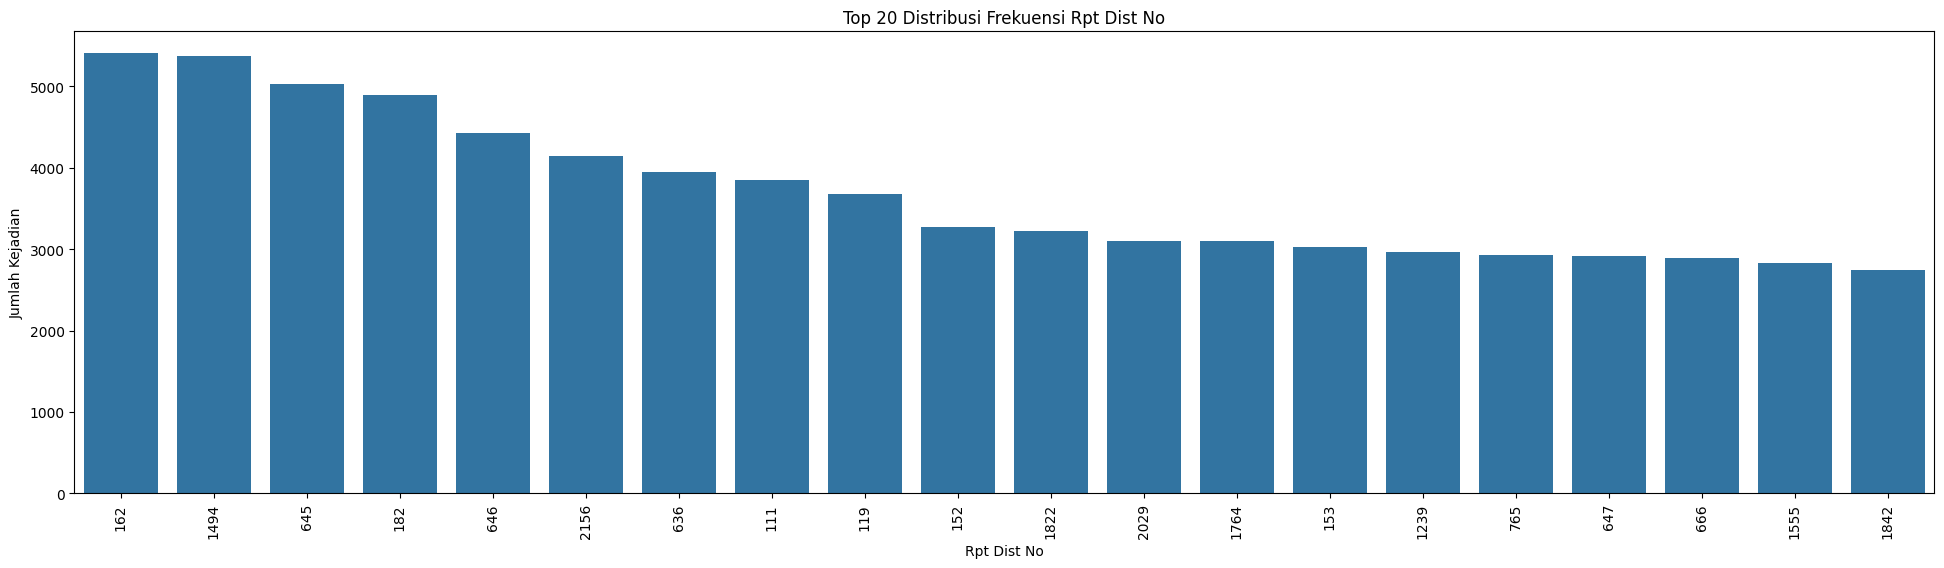

In [ ]:
# Distribusi rpt_dist_no (mungkin terlalu banyak nilai unik, kita bisa lihat top N)
plt.figure(figsize=(24, 6))
top_n = df['rpt_dist_no'].value_counts().nlargest(20).index
sns.countplot(data=df[df['rpt_dist_no'].isin(top_n)], x='rpt_dist_no', order=top_n)
plt.title('Top 20 Distribusi Frekuensi Rpt Dist No')
plt.xlabel('Rpt Dist No')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=90)
plt.show()

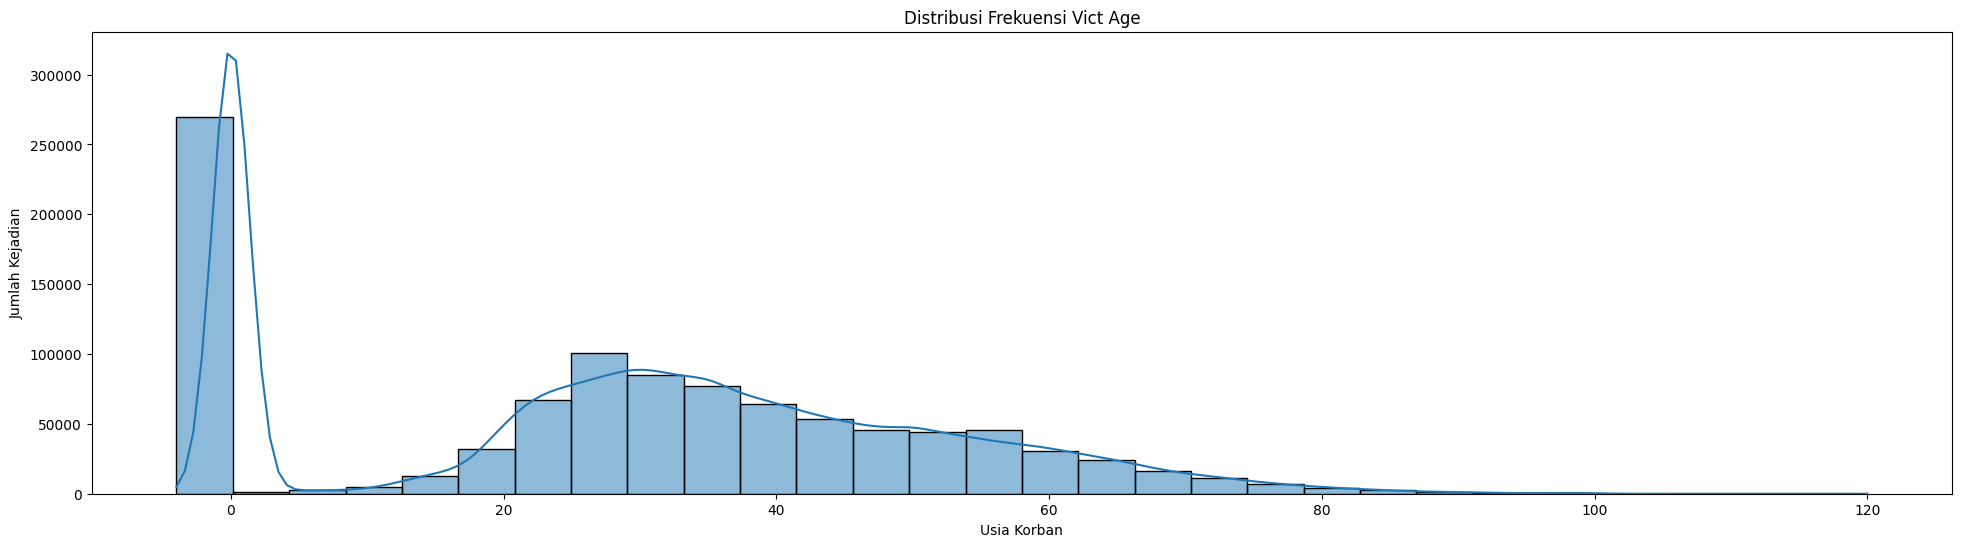

In [ ]:
# Distribusi vict_age
plt.figure(figsize=(24, 6))
sns.histplot(df['vict_age'], bins=30, kde=True)
plt.title('Distribusi Frekuensi Vict Age')
plt.xlabel('Usia Korban')
plt.ylabel('Jumlah Kejadian')
plt.show()

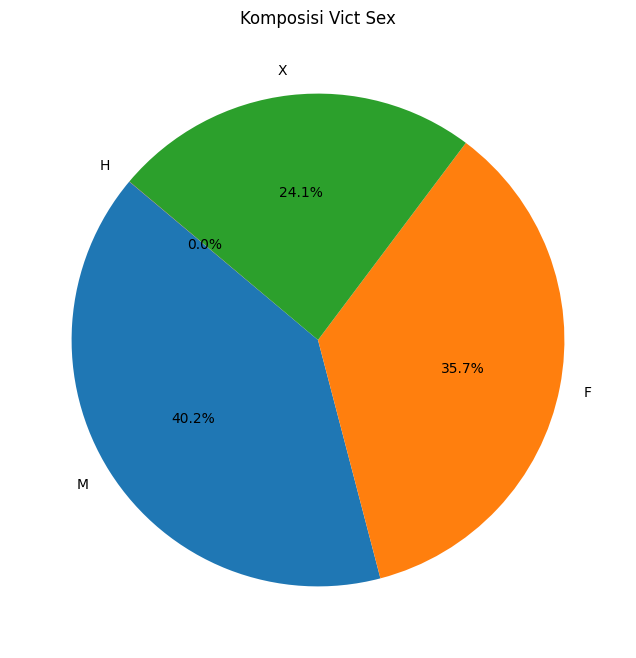

In [ ]:
# Distribusi vict_sex
plt.figure(figsize=(8, 8))
df['vict_sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Vict Sex')
plt.ylabel('') # Remove default y-label for pie chart
plt.show()

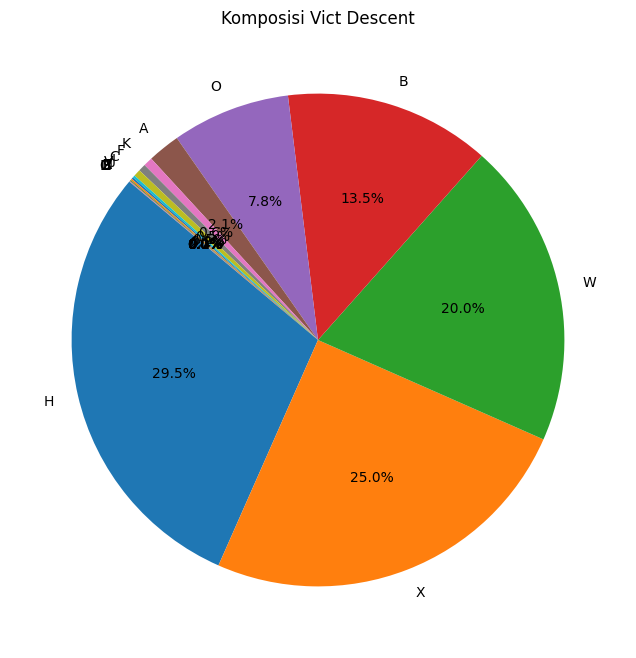

In [ ]:
# Distribusi vict_descent
plt.figure(figsize=(10, 8))
df['vict_descent'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Vict Descent')
plt.ylabel('') # Remove default y-label for pie chart
plt.show()

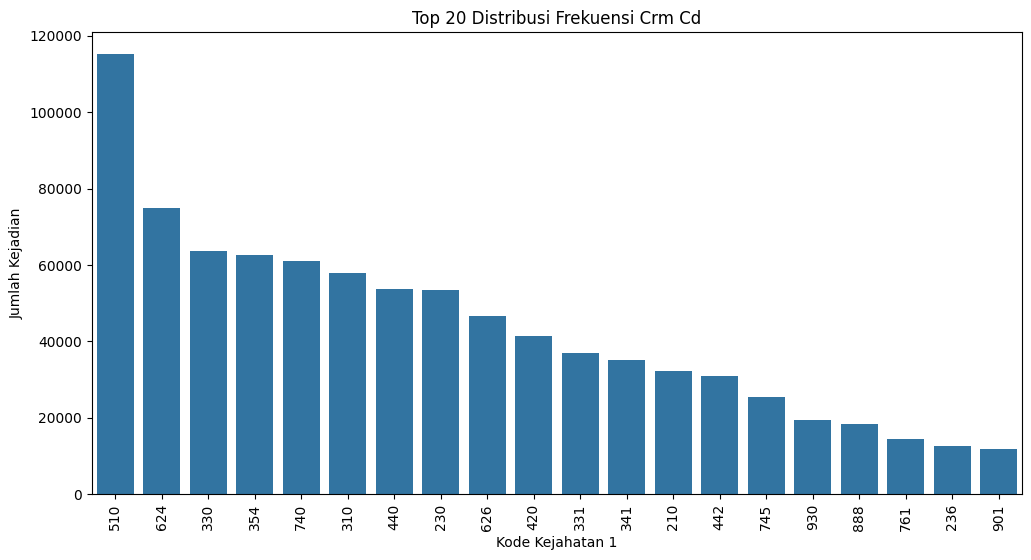

In [ ]:
# Distribusi crm_cd_1 (lihat top N kode kejahatan)
plt.figure(figsize=(12, 6))
top_n_crm = df['crm_cd'].value_counts().nlargest(20).index
sns.countplot(data=df[df['crm_cd'].isin(top_n_crm)], x='crm_cd', order=top_n_crm)
plt.title('Top 20 Distribusi Frekuensi Crm Cd')
plt.xlabel('Kode Kejahatan 1')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=90)
plt.show()

# Training Model
Download the file "https://raw.githubusercontent.com/datasciencedojo/datasets/master/la_crime/la_crime_reports.csv" using gdown, preprocess the data by converting column names to lowercase and replacing spaces with underscores, truncating the time part from 'date_rptd' and 'date_occ' columns, filling null values in 'mocodes' with 0 after checking for existing 0 values, calculating the composition of 'vict_sex' with a pie chart, counting the occurrences of '-' in 'vict_sex', filling null values and '-' in 'vict_sex' and 'vict_descent' with 'X', filling 'weapon_desc' with 'Unknown' where 'weapon_used_cd' is 0, filling nulls in 'crm_cd_1' with 'crm_cd' and nulls in 'crm_cd_2', 'crm_cd_3', 'crm_cd_4' with 0, filling nulls in 'cross_street' with 'Unknown', converting 'date_rptd' and 'date_occ' to integer timestamps, dropping columns 'area_name', 'crm_cd_desc', 'premis_desc', 'weapon_desc', 'status_desc', 'cross_street', creating 'mocode_1' to 'mocode_10' columns from 'mocodes' by splitting on space and filling nulls with 0, analyzing the frequency distribution of 'time_occ', 'area', 'rpt_dist_no', 'vict_age', 'vict_sex', and 'vict_descent', analyzing the distribution of 'crm_cd_1', identifying where theft (crm_code = 510) frequently occurs and what weapons are used, and analyzing the 'vict_age', 'vict_descent', and 'vict_sex' for crm_cd = 510, and finally, build a predictive model for the likelihood of crime based on 'vict_age', 'vict_sex', 'vict_descent', 'lat', and 'lon', predicting the 'crm_cd'.

## Define the target variable

### Subtask:
Determine what specifically you want to predict (e.g., a specific crime type, a category of crime, or a binary outcome like "theft" vs. "non-theft" if you had non-crime data). For this dataset, we can potentially predict the `crm_cd` or group `crm_cd` into broader categories.


**Reasoning**:
Examine the unique values and their frequencies in the `crm_cd` column.



In [ ]:
df.dtypes

,0
dr_no,int64
date_rptd,object
date_occ,object
time_occ,int64
area,int64
rpt_dist_no,int64
part_1-2,int64
crm_cd,int64
vict_age,int64
vict_sex,object


In [ ]:
crm_code_counts = df['crm_cd'].value_counts()
display(crm_code_counts.head(20))
display(f"Number of unique crime codes: {len(crm_code_counts)}")

,count
crm_cd,
510,115190
624,74839
330,63517
354,62537
740,61092
310,57871
440,53717
230,53525
626,46712


'Number of unique crime codes: 140'

**Reasoning**:
Based on the large number of unique crime codes (140) and the uneven distribution shown in the value counts, predicting the specific `crm_cd` directly would be a multi-class classification problem with a large number of classes, many of which are infrequent. This can be challenging for modeling. Grouping the crime codes into broader categories would simplify the problem and potentially improve model performance. A reasonable grouping strategy is to use the `part_1-2` column, which categorizes crimes into Part 1 (more serious) and Part 2 (less serious).



## Feature Engineering 1 - Grouping kategori kejahatan

In [ ]:
# Define the mapping from crm_cd to crime categories
crime_category_mapping = {
    110: 'homicide', 113: 'homicide',
    121: 'rape', 122: 'rape', 815: 'rape', 820: 'rape', 821: 'rape',
    210: 'robbery', 220: 'robbery',
    230: 'agg assaults', 231: 'agg assaults', 235: 'agg assaults', 236: 'agg assaults', 250: 'agg assaults', 251: 'agg assaults', 761: 'agg assaults', 926: 'agg assaults',
    435: 'simple assault', 436: 'simple assault', 437: 'simple assault', 622: 'simple assault', 623: 'simple assault', 624: 'simple assault', 625: 'simple assault', 626: 'simple assault', 627: 'simple assault', 647: 'simple assault', 763: 'simple assault', 928: 'simple assault', 930: 'simple assault',
    310: 'burglary', 320: 'burglary',
    510: 'mvt', 520: 'mvt', 433: 'mvt',
    330: 'btfv', 331: 'btfv', 410: 'btfv', 420: 'btfv', 421: 'btfv',
    350: 'personal thft', 351: 'personal thft', 352: 'personal thft', 353: 'personal thft', 450: 'personal thft', 451: 'personal thft', 452: 'personal thft', 453: 'personal thft',
    341: 'other theft', 343: 'other theft', 345: 'other theft', 440: 'other theft', 441: 'other theft', 442: 'other theft', 443: 'other theft', 444: 'other theft', 445: 'other theft', 470: 'other theft', 471: 'other theft', 472: 'other theft', 473: 'other theft', 474: 'other theft', 475: 'other theft', 480: 'other theft', 485: 'other theft', 487: 'other theft', 491: 'other theft'
}

# Create the new target column 'crime_category'
df['crime_category'] = df['crm_cd'].map(crime_category_mapping).fillna('Other')

# Display the distribution of the new target column
display(df['crime_category'].value_counts())

,count
crime_category,
Other,253376
simple assault,154473
btfv,143336
other theft,134649
mvt,119244
agg assaults,84521
burglary,61822
robbery,37154
personal thft,8185


## Percobaan training pertama

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and target
features = ['vict_age', 'vict_sex', 'vict_descent', 'lat', 'lon']
target = 'crime_category'

X = df[features].copy()
y = df[target].copy()

# Initialize LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_descent = LabelEncoder()
label_encoder_category = LabelEncoder()

# Apply Label Encoding to categorical features and the target
X['vict_sex_encoded'] = label_encoder_sex.fit_transform(X['vict_sex'])
X['vict_descent_encoded'] = label_encoder_descent.fit_transform(X['vict_descent'])
y_encoded = label_encoder_category.fit_transform(y)

# Drop original categorical columns from features
X = X.drop(columns=['vict_sex', 'vict_descent'])

# Display the head of the processed features and target
display(X.head())
display(y_encoded[:5])

,vict_age,lat,lon,vict_sex_encoded,vict_descent_encoded
0,31,34.2124,-118.4092,2,6
1,32,34.1993,-118.4203,2,6
2,30,34.1847,-118.4509,2,16
3,47,34.0339,-118.3747,0,0
4,63,33.9813,-118.4350,2,6


array([0, 1, 0, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize the Random Forest Classifier model
# Using a smaller number of estimators for faster initial training
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train_encoded)

print("Model Random Forest telah selesai dilatih.")

Model Random Forest telah selesai dilatih.


In [ ]:
# Predict on the test set
y_pred_encoded = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy Score: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder_category.classes_))

Accuracy Score: 0.3778

Classification Report:
                precision    recall  f1-score   support

         Other       0.39      0.46      0.42     50675
  agg assaults       0.23      0.20      0.21     16904
          btfv       0.29      0.25      0.27     28667
      burglary       0.27      0.19      0.22     12365
      homicide       0.02      0.01      0.01       315
           mvt       0.64      0.78      0.70     23849
   other theft       0.43      0.40      0.41     26930
 personal thft       0.19      0.11      0.14      1637
          rape       0.08      0.04      0.05      1331
       robbery       0.12      0.07      0.09      7431
simple assault       0.30      0.32      0.31     30895

      accuracy                           0.38    200999
     macro avg       0.27      0.26      0.26    200999
  weighted avg       0.36      0.38      0.37    200999



### Feature Engineering 2 - Grouping tipe kejahatan & menambahkan fitur time_occ

In [ ]:
# Define the mapping from the 11 crime categories to the two new categories
two_category_mapping = {
    'homicide': 'violent crime',
    'rape': 'violent crime',
    'robbery': 'violent crime',
    'agg assaults': 'violent crime',
    'simple assault': 'violent crime',
    'burglary': 'property crime',
    'btfv': 'property crime',
    'personal thft': 'property crime',
    'other theft': 'property crime',
    'mvt': 'property crime', # MVT is typically considered a property crime
    'Other': 'violent crime' # Keep 'Other' category or decide how to handle it
}

# Create the new target column 'crime_type'
df['crime_type'] = df['crime_category'].map(two_category_mapping).fillna('Other') # Handle potential categories not in the mapping

# Display the distribution of the new target column
display(df['crime_type'].value_counts())

,count
crime_type,
violent crime,537755
property crime,467236


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and the new target
features = ['vict_age', 'vict_sex_encoded', 'vict_descent_encoded', 'lat', 'lon', 'time_occ']
target = 'crime_type'

X = df[features].copy()
y = df[target].copy()

# Encode the new target variable
label_encoder_crime_type = LabelEncoder()
y_encoded_two_categories = label_encoder_crime_type.fit_transform(y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame (optional, but good for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Display the head of the scaled features and encoded target
display(X_scaled_df.head())
display(y_encoded_two_categories[:5])

,vict_age,vict_sex_encoded,vict_descent_encoded,lat,lon,time_occ
0,0.094710,0.393030,-0.708688,0.132980,-0.057024,-0.760144
1,0.140180,0.393030,-0.708688,0.124846,-0.059012,0.775810
2,0.049241,0.393030,0.918289,0.115782,-0.064494,-0.153442
3,0.822224,-1.270596,-1.684875,0.022159,-0.050844,-0.045926
4,1.549738,0.393030,-0.708688,-0.010497,-0.061645,0.752771


array([1, 1, 1, 0, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets (using scaled features and the new encoded target)
X_train_scaled, X_test_scaled, y_train_encoded_two, y_test_encoded_two = train_test_split(
    X_scaled_df, y_encoded_two_categories, test_size=0.2, random_state=42, stratify=y_encoded_two_categories
)

# Initialize the Random Forest Classifier model
# Using a smaller number of estimators for faster initial training
model_two_categories = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model_two_categories.fit(X_train_scaled, y_train_encoded_two)

print("Model Random Forest dengan target 2 kategori telah selesai dilatih dengan fitur yang dinormalisasi.")

Model Random Forest dengan target 2 kategori telah selesai dilatih dengan fitur yang dinormalisasi.


In [ ]:
# Predict on the test set
y_pred_encoded_two = model_two_categories.predict(X_test_scaled)

# Evaluate the model
accuracy_two = accuracy_score(y_test_encoded_two, y_pred_encoded_two)
print(f"Accuracy Score (2 Categories): {accuracy_two:.4f}")

# Display classification report
print("\nClassification Report (2 Categories):")
print(classification_report(y_test_encoded_two, y_pred_encoded_two, target_names=label_encoder_crime_type.classes_))

Accuracy Score (2 Categories): 0.7184

Classification Report (2 Categories):
                precision    recall  f1-score   support

property crime       0.72      0.64      0.68     93448
 violent crime       0.72      0.79      0.75    107551

      accuracy                           0.72    200999
     macro avg       0.72      0.71      0.71    200999
  weighted avg       0.72      0.72      0.72    200999



Pentingnya Fitur dalam Model Random Forest:


,0
lat,0.231350
lon,0.227265
time_occ,0.212542
vict_age,0.170983
vict_descent_encoded,0.086506
vict_sex_encoded,0.071355


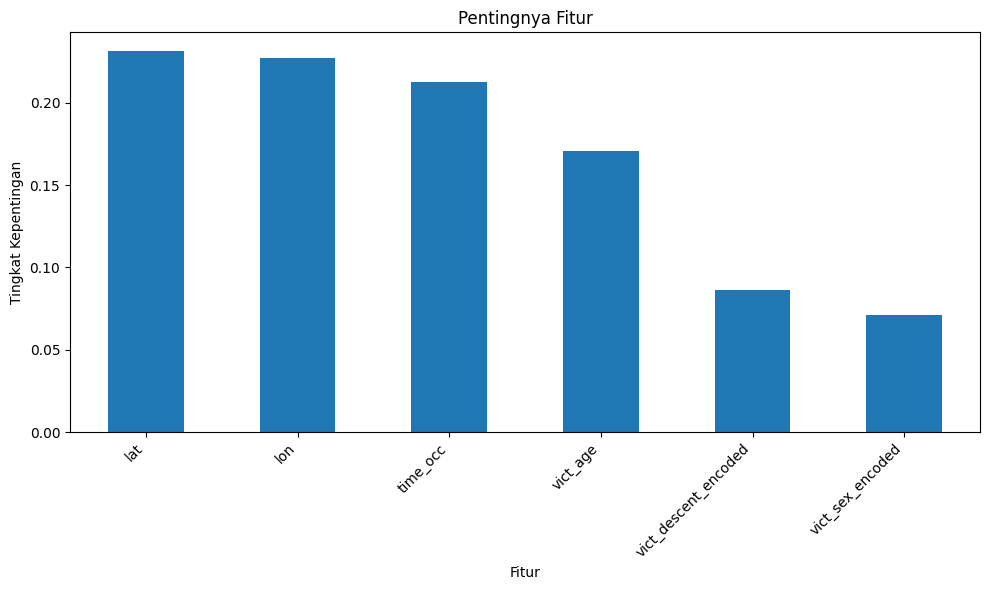

In [ ]:
# Get feature importances from the trained model
feature_importances = model_two_categories.feature_importances_

# Get the names of the features
feature_names = X_scaled_df.columns

# Create a pandas Series for easier visualization and sorting
importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Display the feature importances
print("Pentingnya Fitur dalam Model Random Forest:")
display(importance_series)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
importance_series.plot(kind='bar')
plt.title('Pentingnya Fitur')
plt.xlabel('Fitur')
plt.ylabel('Tingkat Kepentingan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Engineering 3 - Membuat fitur baru, bulan, hari, dan weekend, atau weekdays

In [ ]:
# Convert 'date_occ' back to datetime objects for easier feature extraction
df['date_occ_datetime'] = pd.to_datetime(df['date_occ'], format='%m/%d/%Y')

# Extract the month
df['month_occ'] = df['date_occ_datetime'].dt.month

# Determine if it's a weekend (Saturday or Sunday)
df['day_of_week_occ'] = df['date_occ_datetime'].dt.dayofweek # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week_occ'].apply(lambda x: 1 if x >= 5 else 0) # 1 for weekend, 0 for weekday

# Display the head of the new columns
display(df[['date_occ', 'month_occ', 'day_of_week_occ', 'is_weekend']].head())

# Drop the intermediate datetime column if not needed
df = df.drop(columns=['date_occ_datetime'])

,date_occ,month_occ,day_of_week_occ,is_weekend
0,11/07/2020,11,5,1
1,10/18/2020,10,6,1
2,10/30/2020,10,4,0
3,12/24/2020,12,3,0
4,09/29/2020,9,1,0


In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features including the new time-based features
features_expanded = ['vict_age', 'vict_sex_encoded', 'vict_descent_encoded', 'lat', 'lon', 'time_occ', 'month_occ', 'day_of_week_occ', 'is_weekend']
target = 'crime_type'

X_expanded = df[features_expanded].copy()
y_expanded = df[target].copy()

# Encode the target variable (if not already encoded correctly for the two categories)
# We can reuse the previous label_encoder_crime_type if it mapped to 0 and 1
# Or re-initialize if needed to ensure consistent encoding for the two categories
label_encoder_crime_type_expanded = LabelEncoder()
y_encoded_two_categories_expanded = label_encoder_crime_type_expanded.fit_transform(y_expanded)


# Initialize the MinMaxScaler
scaler_expanded = MinMaxScaler()

# Fit and transform all features
X_expanded_scaled = scaler_expanded.fit_transform(X_expanded)

# Convert scaled features back to a DataFrame (optional, but good for readability)
X_expanded_processed = pd.DataFrame(X_expanded_scaled, columns=features_expanded)


# Display the head of the processed features and encoded target
display(X_expanded_processed.head())
display(y_encoded_two_categories_expanded[:5])

,vict_age,vict_sex_encoded,vict_descent_encoded,lat,lon,time_occ,month_occ,day_of_week_occ,is_weekend
0,0.282258,0.666667,0.333333,0.996450,0.002178,0.357930,0.909091,0.833333,1.0
1,0.290323,0.666667,0.333333,0.996068,0.002084,0.782019,0.818182,1.000000,1.0
2,0.274194,0.666667,0.888889,0.995643,0.001826,0.525445,0.818182,0.666667,0.0
3,0.411290,0.000000,0.000000,0.991251,0.002468,0.555131,1.000000,0.500000,0.0
4,0.540323,0.666667,0.333333,0.989719,0.001960,0.775657,0.727273,0.166667,0.0


array([1, 1, 1, 0, 0])

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets (using processed features and the encoded target)
X_train_processed, X_test_processed, y_train_encoded_expanded, y_test_encoded_expanded = train_test_split(
    X_expanded_processed, y_encoded_two_categories_expanded, test_size=0.2, random_state=42, stratify=y_encoded_two_categories_expanded
)

# Initialize the Random Forest Classifier model
model_expanded = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model_expanded.fit(X_train_processed, y_train_encoded_expanded)

print("Model Random Forest dengan target 2 kategori telah selesai dilatih dengan fitur tambahan.")

Model Random Forest dengan target 2 kategori telah selesai dilatih dengan fitur tambahan.


In [126]:
# Predict on the test set
y_pred_encoded_expanded = model_expanded.predict(X_test_processed)

# Evaluate the model
accuracy_expanded = accuracy_score(y_test_encoded_expanded, y_pred_encoded_expanded)
print(f"Accuracy Score (Expanded Features): {accuracy_expanded:.4f}")

# Display classification report
print("\nClassification Report (Expanded Features):")
print(classification_report(y_test_encoded_expanded, y_pred_encoded_expanded, target_names=label_encoder_crime_type_expanded.classes_))

Accuracy Score (Expanded Features): 0.7219

Classification Report (Expanded Features):
                precision    recall  f1-score   support

property crime       0.73      0.64      0.68     93448
 violent crime       0.72      0.79      0.75    107551

      accuracy                           0.72    200999
     macro avg       0.72      0.72      0.72    200999
  weighted avg       0.72      0.72      0.72    200999



# Komparasi dengan algoritma prediksi yang lain
Normalize the features ['vict_age', 'vict_sex_encoded', 'vict_descent_encoded', 'lat', 'lon', 'time_occ', 'month_occ', 'day_of_week_occ', 'is_weekend'] using MinMaxScaler, train multiple classification models on the normalized data, and compare their accuracies.

## Choose additional models

### Subtask:
Select a few different classification algorithms to compare with the Random Forest model.


**Reasoning**:
Choose and initialize a few different classification models from scikit-learn for comparison with the Random Forest model.



In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Logistic Regression model (a linear model)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

# Initialize Decision Tree model (a simple tree-based model)
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize Gradient Boosting model (an ensemble tree-based model)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

print("Initialized Logistic Regression, Decision Tree, and Gradient Boosting models.")

Initialized Logistic Regression, Decision Tree, and Gradient Boosting models.


## Train models

### Subtask:
Train each selected model using the preprocessed and scaled data.


**Reasoning**:
Fit the initialized classification models to the training data.



In [130]:
# Fit the Logistic Regression model
log_reg_model.fit(X_train_processed, y_train_encoded_expanded)

# Fit the Decision Tree model
dt_model.fit(X_train_processed, y_train_encoded_expanded)

# Fit the Gradient Boosting model
gb_model.fit(X_train_processed, y_train_encoded_expanded)

print("All selected models have been trained.")

All selected models have been trained.


## Evaluate models

### Subtask:
Evaluate the performance of each model using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the performance of each trained model using accuracy and classification reports.



In [131]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_processed)
accuracy_log_reg = accuracy_score(y_test_encoded_expanded, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_encoded_expanded, y_pred_log_reg, target_names=label_encoder_crime_type_expanded.classes_))

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test_processed)
accuracy_dt = accuracy_score(y_test_encoded_expanded, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_encoded_expanded, y_pred_dt, target_names=label_encoder_crime_type_expanded.classes_))

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test_processed)
accuracy_gb = accuracy_score(y_test_encoded_expanded, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test_encoded_expanded, y_pred_gb, target_names=label_encoder_crime_type_expanded.classes_))

# Evaluate the previously trained Random Forest model
y_pred_rf = model_expanded.predict(X_test_processed)
accuracy_rf = accuracy_score(y_test_encoded_expanded, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_encoded_expanded, y_pred_rf, target_names=label_encoder_crime_type_expanded.classes_))

Logistic Regression Accuracy: 0.6811

Logistic Regression Classification Report:
                precision    recall  f1-score   support

property crime       0.68      0.59      0.63     93448
 violent crime       0.68      0.76      0.72    107551

      accuracy                           0.68    200999
     macro avg       0.68      0.67      0.68    200999
  weighted avg       0.68      0.68      0.68    200999

Decision Tree Accuracy: 0.6469

Decision Tree Classification Report:
                precision    recall  f1-score   support

property crime       0.62      0.63      0.62     93448
 violent crime       0.67      0.67      0.67    107551

      accuracy                           0.65    200999
     macro avg       0.65      0.65      0.65    200999
  weighted avg       0.65      0.65      0.65    200999

Gradient Boosting Accuracy: 0.7049

Gradient Boosting Classification Report:
                precision    recall  f1-score   support

property crime       0.72      0.60   

## Compare results

### Subtask:
Present a summary or visualization of the performance metrics for all trained models to compare their effectiveness.


**Reasoning**:
Create a dictionary to store the accuracy scores and then display it as a pandas DataFrame for a clear summary of model performance.



In [132]:
# Create a dictionary to store accuracy scores
model_accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'Decision Tree': accuracy_dt,
    'Gradient Boosting': accuracy_gb,
    'Random Forest': accuracy_expanded
}

# Convert the dictionary to a pandas DataFrame for display
model_performance_summary = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Display the summary table
display("Model Performance Summary:")
display(model_performance_summary)

'Model Performance Summary:'

,Model,Accuracy
0,Logistic Regression,0.681108
1,Decision Tree,0.646879
2,Gradient Boosting,0.704929
3,Random Forest,0.721889


**Reasoning**:
Create a bar plot to visualize the accuracy scores of the models, add titles and labels, and then display the plot.



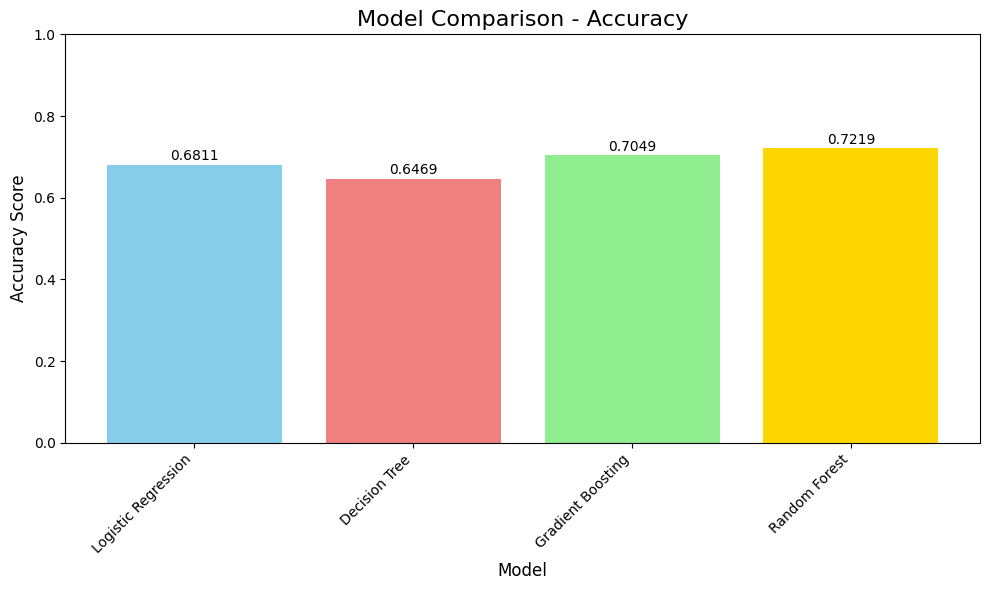

In [133]:
# Create a bar plot to visualize the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(model_performance_summary['Model'], model_performance_summary['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0, 1) # Set y-axis limit for accuracy between 0 and 1

# Add titles and labels
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add accuracy values on top of the bars
for index, row in model_performance_summary.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f'{row["Accuracy"]:.4f}', ha='center')

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summary:

### Data Analysis Key Findings

*   Four classification models were trained and evaluated: Logistic Regression, Decision Tree, Gradient Boosting, and Random Forest.
*   The models were trained on normalized features ['vict\_age', 'vict\_sex\_encoded', 'vict\_descent\_encoded', 'lat', 'lon', 'time\_occ', 'month\_occ', 'day\_of\_week\_occ', 'is\_weekend'].
*   Accuracy scores were calculated for each model on the test set.
*   Random Forest achieved the highest accuracy at 0.7219.
*   Gradient Boosting had the second highest accuracy at 0.7049.
*   Logistic Regression and Decision Tree models had lower accuracies at 0.6811 and 0.6469, respectively.

### Insights or Next Steps

*   Random Forest and Gradient Boosting models performed significantly better than Logistic Regression and Decision Tree on this dataset.
*   Further hyperparameter tuning for the Random Forest and Gradient Boosting models could potentially improve performance.
